In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay
)

In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [10]:
print("\nMissing values after replacement:")
print(df.isna().sum())


Missing values after replacement:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [11]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("\nTrain size:", X_train.shape, "Test size:", X_test.shape)


Train size: (614, 8) Test size: (154, 8)


In [13]:
preprocess = Pipeline([
    ("imputer",SimpleImputer(strategy = "median")),
    ("scaler",StandardScaler())
])

In [14]:
pipe_lr = Pipeline([
    ("preprocess",preprocess),
    ("clf",LogisticRegression(max_iter=1000))
])

In [15]:
pipe_rf = Pipeline([
    ("preprocess",preprocess),
    ("clf",RandomForestClassifier(n_estimators = 200,random_state = 42))
])

In [16]:
pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('clf',
                 RandomForestClassifier(n_estimators=200, random_state=42))])


 === Logistic Regression ===
Accuracy: 0.7077922077922078
Precision: 0.6
Recall: 0.5
F1-score: 0.5454545454545454
ROC-AUC: 0.812962962962963

 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



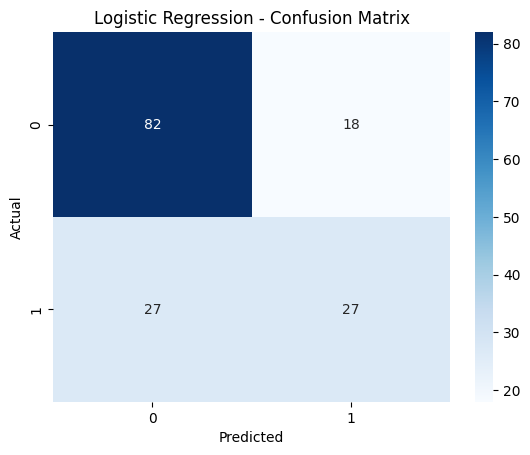

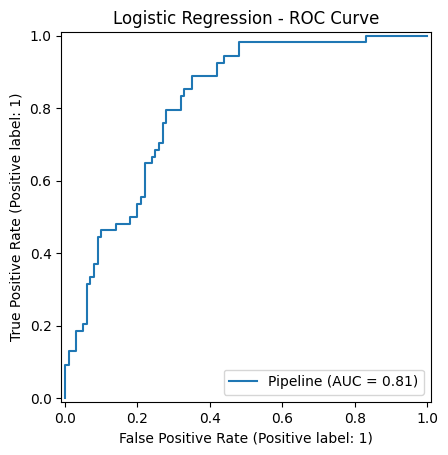


 === Random Forest ===
Accuracy: 0.7467532467532467
Precision: 0.6595744680851063
Recall: 0.5740740740740741
F1-score: 0.6138613861386139
ROC-AUC: 0.8164814814814814

 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       100
           1       0.66      0.57      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154



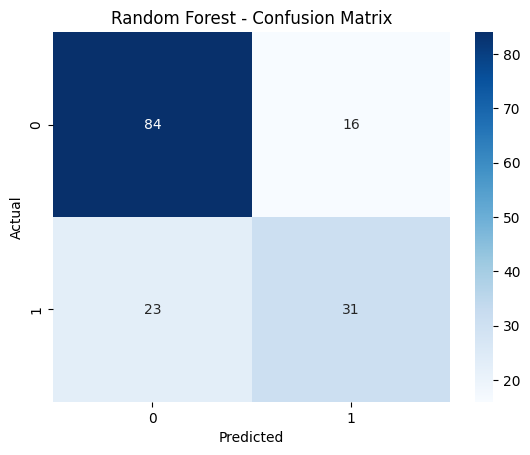

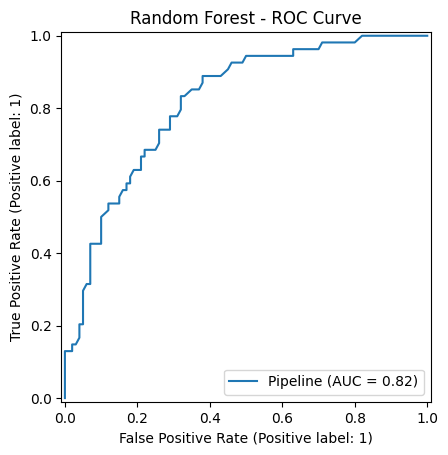

In [17]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    print(f"\n === {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    print("\n Classification Report:\n",classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True,fmt="d",cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"{name} - ROC Curve")
    plt.show()

evaluate_model("Logistic Regression",pipe_lr,X_test,y_test)
evaluate_model("Random Forest",pipe_rf,X_test,y_test)

In [18]:
import joblib

In [20]:
joblib.dump(pipe_rf, "pima_diabetes_model.pkl")
print("\nModel saved as pima_diabetes_model.pkl")


Model saved as pima_diabetes_model.pkl


In [22]:
sample = X_test.sample(1,random_state=1)
print("\n Sample input:\n",sample)


 Sample input:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
713            0    134.0           58.0           20.0    291.0  26.4   

     DiabetesPedigreeFunction  Age  
713                     0.352   21  


In [24]:
pred = pipe_rf.predict(sample)[0]
proba = pipe_rf.predict_proba(sample)[0,1]
print("Predicted outcome:", pred, "(1 = Diabetes, 0 = No Diabetes)")
print("Predicted probability:", round(proba, 3))

Predicted outcome: 0 (1 = Diabetes, 0 = No Diabetes)
Predicted probability: 0.185
